#Traveling Salesperson Project

Leon 

Use simulated annealing to and an approximate solution to the Traveling Salesperson Problem
(TSP). Put all your work in a new Colab notebook. Set things up so you can easily vary the number
of points N. See how large you can make N and still and a good tour in reasonable amount of time.

Then implement at least one of the following extensions of the TSP:
1. Suppose north-south travel is more expensive than east-west travel. Modify your distance
function so that the difference between y-values is multiplied by some constant c. You might
think of this new function as a \cost" function rather than a distance function. This is now
the function to minimize along the tour.
2. Suppose that the points lie on either side of a border, and crossing the border involves an
additional cost. For example, you might let the line y = 5 be the border. If an edge crosses
this line, then its \cost" equals its distance plus some constant c. The cost of traveling along
an edge that doesn't cross the border is simply the distance along the edge. The cost function
is now the function to minimize along the tour.

#Goals:
1. use simulated annealing to approximate the solution to the Traveling Salesperson Problem.
2. Impleament one of the extensions

In [0]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math

[[2.5125235  8.91840626]
 [2.10524615 4.20022851]
 [5.26553432 1.16045377]
 [2.21800899 0.11137647]
 [0.76735627 6.43659252]
 [4.52154485 4.84425855]
 [2.00236056 0.36967003]
 [2.71149726 9.28705239]
 [1.06979523 9.63174494]
 [5.28985202 1.71999772]]


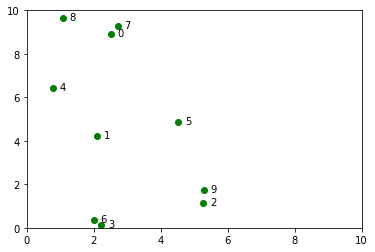

In [191]:
N = 10 # number of points

# generate random points
points = np.random.rand(N, 2) * 10
print(points)

# make the plot
plt.plot(points[:,0], points[:,1], 'go') # plot the points
for i in range(N): # add text labels
    plt.text(points[i,0]+0.2, points[i,1]-0.1, str(i))
plt.xlim(0,10) # set the x-axis limits
plt.ylim(0,10) # set the y-axis limits
plt.show()     # show the plot

# New Section

In [0]:
import 
trivialTour = list(range(N))
trivialTour

TypeError: ignored

In [0]:
path = plt.Polygon(points, fill=None, edgecolor='0.5') # create the tour
plt.gca().add_patch(path) # add the tour to the plot
plt.plot(points[:,0], points[:,1], 'go') # plot the points
for i in range(N): # add text labels
    plt.text(points[i,0]+0.2, points[i,1]-0.1, str(i))
plt.xlim(0,10) # set the x-axis limits
plt.ylim(0,10) # set the y-axis limits
plt.show()     # show the plot

In [0]:
# compute the distance between the ith and jth points on a tour
# assume the coordinates of points are stored in a global variable called `points`
def distPair(tour, i, j):
  x1 = points[tour[i],0] #index of ith point on the tour   #tour[j] index of jth point of the tour
  y1=points[tour[i],1]
  x2 = points[tour[j],0]
  y2 = points[tour[j],1]
  dis = math.sqrt((x2-x1)**2 + (y2-y1)**2)
  
  return dis

In [0]:
distPair(trivialTour, 1, 2)

5.192128052623694

In [0]:
def distTour(tour):
  dist = 0
  N = len(tour)
  
  for i in range(N-1): # i from 0 to N-2
    # first point is tour[0] to tour[1], last pair is from tour[N-2] to tour[N-1]
    dist += distPair(tour, i, i+1)
    dist += distPair(tour, N-1, 0)
  return dist

In [0]:
distTour(trivialTour)

65.65517026573443

In [0]:
randomTour = random.sample(range(N), N)
randomTour

[1, 7, 2, 5, 0, 6, 9, 8, 4, 3]

In [0]:
distTour(randomTour)

115.24845449847366

In [0]:
def plotTour(tour):
  tourPts = np.zeros((N,2))
  for i in range(N):
    tourPts[i] = points[tour[i]]
    
  plt.figure(figsize=(10,10), dpi=60) # resize the plot
  path = plt.Polygon(tourPts, fill=None, edgecolor='0.5') # create the tour
  plt.gca().add_patch(path) # add the tour to the plot
  plt.plot(points[:,0], points[:,1], 'go') # plot the points
  for i in range(N): # add text labels
    plt.text(points[i,0]+0.2, points[i,1]-0.1, str(i))
  plt.xlim(0,10) # set the x-axis limits
  plt.ylim(0,10) # set the y-axis limits
  plt.show()     # show the plot

#Annealing 

In [0]:
N = 10 # number of points

# generate random points
points = np.random.rand(N, 2) * 10

trivial tour length: 89.57747425528498


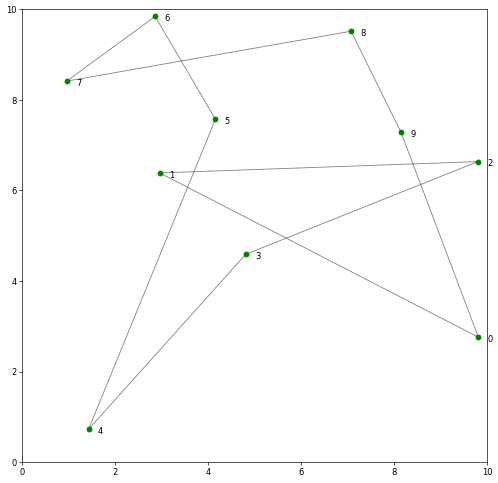

In [0]:
trivialTour = list(range(N))
print("trivial tour length:", distTour(trivialTour))
plotTour(trivialTour)

In [0]:
N = 10
currTour = random.sample(range(N), N) # start with a random tour

numSteps = 100 # number of steps
sig2 = 1 # starting value for sigma^2
decFac = 0.9 # decrease factor

dist = distTour(currTour) # this is the only time we need to call distTour()

for s in range(numSteps):
  # choose two indexes i < j, from the set {0, 1, ..., N-1}
  # make sure it is not the case that i = 0 and j = N-1 (if this occurs, you could just use `continue` to try again)
  I = random.randint(0,N-1)
  J = random.randint(0,N-1)
  if J > I and I!=0 and J!=N-1:
     i = I;j = J
  else:
    continue
print("i,j",i,j)
  
  # compute the distance lost and the distance gained
  distLost = distPair(currTour,i-1,i) + distPair(currTour, j, j+1)
  distGain = distPair(currTour,i-1,j) + distPair(currTour, i, j+1)
  deltaDist = distGain - distLost
  
  # compute rho
  # avoid overflow when deltaDist is negative and sig2 is very close to zero
  rho = 1
  if deltaDist > 0:
    rho = math.exp(-deltaDist/sig2)
    
  rand = random.random()    # random number between 0 and 1
  if rand < rho:
    # then accept the proposed transition
    # this involves updating currTour by reversing part of the tour
    originalTour = np.copy(currTour) #just make a copy of the original tour for
    #later check
    
    currTour[i],currTour[j] = currTour[j],currTour[i]
    
    # also make sure you update dist
    dist = distTour(currTour)
    
  # otherwise, no transition
  
  # decrease sigma^2
  sig2 = sig2*decFac
  
  # If you want, print sig2 and dist every 100 steps. This is a useful check.
  if s % 100 == 0:
    print("sig2:", sig2, ", dist:", dist)
    
    
# display the results
print("Finished. Distance is:", dist)
plotTour(currTour)

  

In [0]:
for s in range(10):
  # choose two indexes i < j, from the set {0, 1, ..., N-1}
  # make sure it is not the case that i = 0 and j = N-1 (if this occurs, you could just use `continue` to try again)
  N = 10
  list1=[]
  I = random.randint(0,N-1)
  J = random.randint(0,N-1)
  if J > I and I!=0 and J!=N-1:
     i = I;j = J
    
  else:
    continue
#print(list3[0],list3[1])   
    
print (i,j)
      


     



4 5


In [0]:
t1 = random.sample(range(N), N) 
t1


[1, 7, 5, 8, 6, 2, 9, 3, 0, 4]

In [0]:
t1[0],t1[1] = t1[1],t1[0]
t1


[7, 1, 5, 8, 6, 2, 9, 3, 0, 4]